In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import seaborn as sns

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay,f1_score,classification_report,accuracy_score
from sklearn import metrics

In [3]:
data =  pd.read_csv('spam.csv',encoding='ISO-8859-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
data.shape

(5572, 5)

In [6]:
# remove these redudant , null records
columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4']
data = data.drop(data[columns],axis=1)

In [7]:
data.rename(columns={'v1':'Target','v2':'Text'}, inplace=True)

In [8]:
data.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  5572 non-null   object
 1   Text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
data.shape

(5572, 2)

## Data Exploration

C:\Users\akkan\AppData\Local\Temp\ipykernel_23064\1210204143.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fg = sns.countplot(x=data['Target'],palette=palette)


Text(0, 0.5, 'Number of Data points')

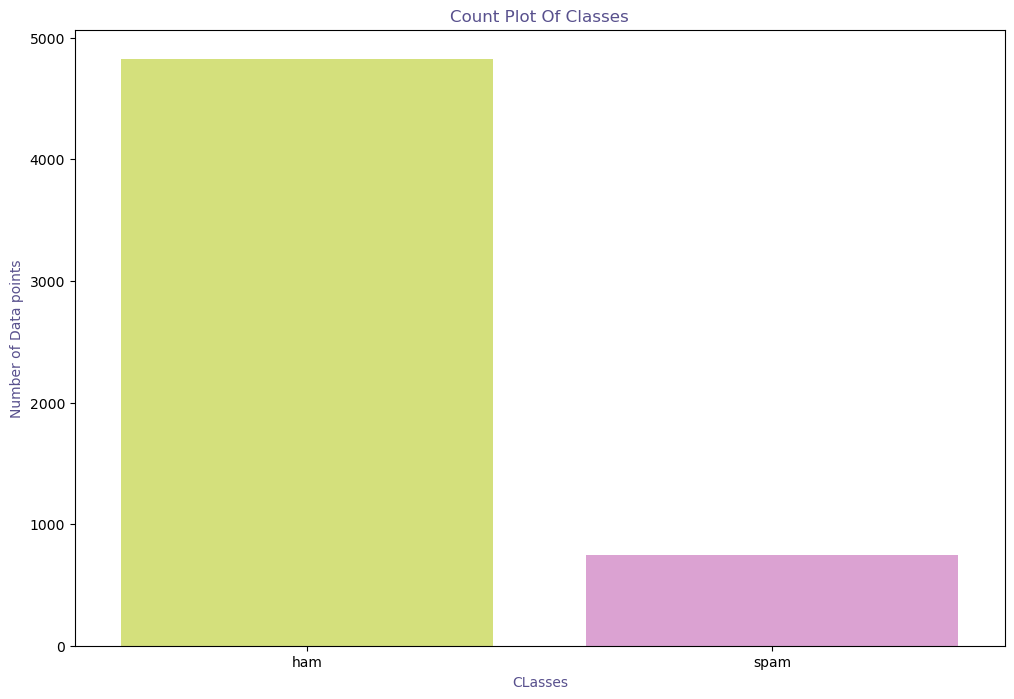

In [11]:
# palette
palette = ["#E1F16B","#E598D8"]
# first we check the target and find out if our data is imbalanced or not
plt.figure(figsize=(12,8))
fg = sns.countplot(x=data['Target'],palette=palette)
fg.set_title("Count Plot Of Classes", color = "#58508d")
fg.set_xlabel("CLasses", color = "#58508d")
fg.set_ylabel("Number of Data points", color = "#58508d")


In [12]:
# creating new features
data['characters'] = data['Text'].apply(len)
data['words'] = data.apply(lambda row : nltk.word_tokenize(row['Text']),axis =1).apply(len)
data['Sentencs'] = data.apply(lambda row : nltk.sent_tokenize(row['Text']),axis=1).apply(len)

In [13]:
data.describe()

,characters,words,Sentencs
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [14]:
data.head()

,Target,Text,characters,words,Sentencs
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<Figure size 1200x800 with 0 Axes>

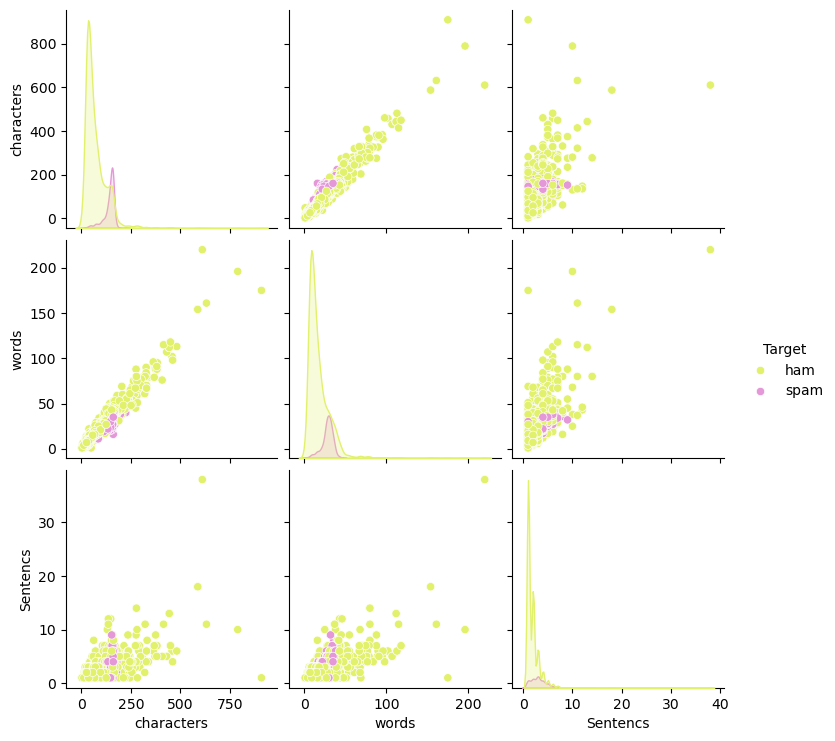

In [15]:
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=data, hue="Target",palette=palette)
plt.show(fg)

In [16]:
# outlier
data = data[(data['characters']<350)]

In [17]:
data.shape

(5548, 5)

<Figure size 1200x800 with 0 Axes>

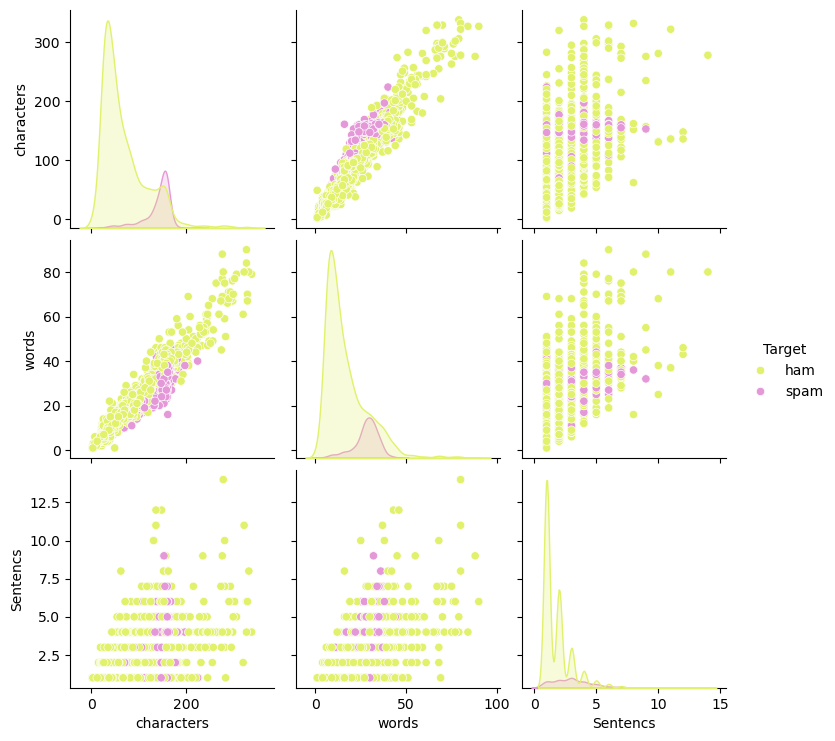

In [18]:
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=data, hue="Target",palette=palette)
plt.show(fg)

In [19]:
data.describe()

,characters,words,Sentencs
count,5548.000000,5548.000000,5548.00000
mean,78.368962,18.263158,1.96359
std,52.802290,11.814074,1.35754
min,2.000000,1.000000,1.00000
25%,35.000000,9.000000,1.00000
50%,61.000000,15.000000,1.00000
75%,121.000000,27.000000,2.00000
max,338.000000,90.000000,14.00000


In [20]:
# Data Preprocessing
# cleaning text
def clean(Text):
    # Replacing all non alphabetic charcters with a space
    sms = re.sub('[^a-zA-Z]', ' ', Text)
    
    sms = sms.lower() 
    sms = sms.split()
    sms = ' '.join(sms)
    return sms

In [21]:
data['clean_text'] = data['Text'].apply(clean)

In [22]:
data.head()

,Target,Text,characters,words,Sentencs,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry in a wkly comp to win fa cup final ...
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i don t think he goes to usf he lives arou...


In [23]:
data["clean_text"][:5]

0    go until jurong point crazy available only in ...
1                              ok lar joking wif u oni
2    free entry in a wkly comp to win fa cup final ...
3          u dun say so early hor u c already then say
4    nah i don t think he goes to usf he lives arou...
Name: clean_text, dtype: object

In [24]:
# tokenization
data["tokenize_text"] = data.apply(lambda row: nltk.word_tokenize(row['clean_text']),axis=1)

In [25]:
data["tokenize_text"][:5]

0    [go, until, jurong, point, crazy, available, o...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, in, a, wkly, comp, to, win, fa, ...
3    [u, dun, say, so, early, hor, u, c, already, t...
4    [nah, i, don, t, think, he, goes, to, usf, he,...
Name: tokenize_text, dtype: object

In [26]:
data.head()

,Target,Text,characters,words,Sentencs,clean_text,tokenize_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,..."


In [27]:
# Removing stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
def remove_stopwords(text):
    stopwords1 = set(stopwords.words('english'))
    return [word for word in text if word not in stopwords1]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akkan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
data['filtered_text'] = data['tokenize_text'].apply(remove_stopwords)

In [29]:
data.head()

,Target,Text,characters,words,Sentencs,clean_text,tokenize_text,filtered_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ...","[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,...","[nah, think, goes, usf, lives, around, though]"


In [30]:
# lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatize_word(text):
    lemmas = [lemmatizer.lemmatize(word, pos='v') for word in text]
    return lemmas

In [31]:
data['lemmatized_text'] = data['filtered_text'].apply(lemmatize_word)

In [32]:
# vectorize
# bagofwords
# creating a corpus of text feature to encode further into vectorized form
corpus = []
for i in data["lemmatized_text"]:
    msg = ' '.join([row for row in i])
    corpus.append(msg)

In [33]:
# changing text data in to numbers
bow = CountVectorizer()
X = bow.fit_transform(corpus).toarray()

In [34]:
X.dtype

dtype('int64')

In [35]:
# Label encode the target and use it as y
label_encoder = LabelEncoder()
data["Target"] = label_encoder.fit_transform(data["Target"])

In [36]:
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
# Testing on the following classifiers
clf = RandomForestClassifier()

In [38]:
# training and evaluating each classifier
clf.fit(X_train,y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
train_accuracy = accuracy_score(y_train,y_pred_train)
test_accuracy = accuracy_score(y_test,y_pred_test)
print("Train Accuracy :", train_accuracy )
print("Test Accuracy :", test_accuracy)

Train Accuracy : 1.0
Test Accuracy : 0.9774774774774775


In [39]:
cv_clf = RandomForestClassifier()
cv_clf.fit(X_train,y_train)
cv_score = cross_val_score(cv_clf, X_train, y_train , scoring="accuracy",cv=10)
print(cv_score.mean())

0.9734102047871799


In [40]:
# # cross validation score on test dataa
y_test_pred = cv_clf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy = {accuracy_test:.4f}")

Test Accuracy = 0.9784


In [43]:
# model evaluation
pred_train = cv_clf.predict(X_train)
pred_test = cv_clf.predict(X_test)
prec = metrics.precision_score(y_test,pred_test)
recal = metrics.recall_score(y_test,pred_test)
f1_s = metrics.f1_score(y_test,pred_test)
trainn_accuracy = cv_clf.score(X_train,y_train) 
test_accuracy = cv_clf.score(X_test,y_test)

In [44]:
data = {'Precsion':prec,
        'Recall':recal,
        'F1Score':f1_s,
        'Test Accuracy':test_accuracy,
        'Train Accuracy':trainn_accuracy}

In [45]:
data

{'Precsion': 1.0,
 'Recall': 0.8235294117647058,
 'F1Score': 0.9032258064516129,
 'Test Accuracy': 0.9783783783783784,
 'Train Accuracy': 1.0}

In [46]:
# Creates pandas DataFrame.
Results = pd.DataFrame(data, index =["RandomForest"])

In [47]:
cmap2 = ListedColormap(["#E2CCFF","#E598D8"])
Results.style.background_gradient(cmap=cmap2)

,Precsion,Recall,F1Score,Test Accuracy,Train Accuracy
RandomForest,1.000000,0.823529,0.903226,0.978378,1.000000


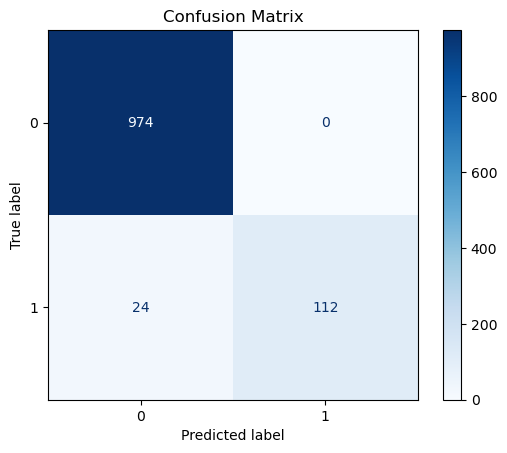

In [48]:
cm = confusion_matrix(y_test, pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()